# Ejercicios de pandas
$Allan$ $Santizo$

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Ejercicio 1

1. Generar arreglos de numpy para obtener el resultado de $ z = f(x,y) $ para un conjunto de entrada aleatorio de al menos 100 filas.

- Crear un `DataFrame` de pandas con las columnas $x$, $y$ y $z$.
- Obtener el promedio de cada `Series` en el `DataFrame`.

In [2]:
#Se define la función
f= lambda x,y:x*y
#Números aleatorios
x=np.random.randint(1,100,100)
y=np.random.randint(50,150,100)
#Evaluar función
z=f(x,y)
#Gerera tabla con variables
df = pd.DataFrame({'x':x,'y':y,'z':z})
df

,x,y,z
0,94,103,9682
1,92,107,9844
2,73,69,5037
3,8,86,688
4,41,146,5986
...,...,...,...
95,44,67,2948
96,1,57,57
97,17,88,1496
98,15,79,1185


In [3]:
#promedio de cada serie en el data frame
df.mean()

x      50.56
y      98.15
z    4917.67
dtype: float64

## Ejercicio 1.1

De forma similar al ejercicio anterior, genere un `DataFrame` con los resultados de una función $y = f(x)$ con al menos 100 filas. 

- Grafique los resultados con `matplotlib` utilizando 2 variantes:

    - a. Utilizando los arreglos de numpy (objetos `ndarray`) que utilizó para generar el `DataFrame`.
    - b. Utilizando los objetos `Series` del `DataFrame`.
    
- Obtenga el objeto *handler* de la gráfica y guarde la gráfica en PDF.

- Asegúrese de entender la diferencia entre generar la gráfica para guardarla (sin mostrarla) y generar la gráfica para mostrarla.

In [4]:
#Se define la función
f= lambda x:x**2
#Números aleatorios
x=np.random.randint(1,100,100)
#Evaluar función
y=f(x)
#Gerera tabla con variables
df = pd.DataFrame({'x':x,'y':y})

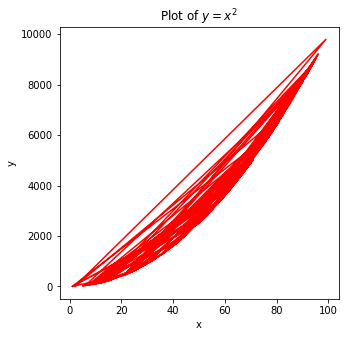

In [5]:
#create a figure/canvas of desired size
plt.figure(figsize=(5,5))
# plot values; with a color red
plt.plot(x,y,'red')
# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')
# give a title to the plot
plt.title(r"Plot of $y=x^2$")
# optionally, save the figure as a pdf using 72 dots per inch
plt.savefig("fxmat.pdf", format='pdf', dpi=72)
#muestra graf
plt.show()

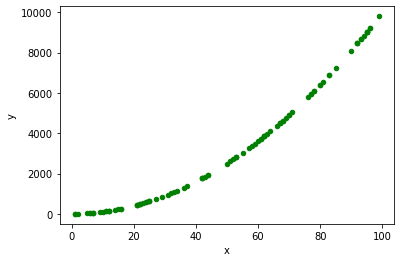

In [6]:
#Genera gráfica con pandas
x=df.plot.scatter(x="x",y="y",color="green")
x.get_figure().savefig("fxpanda.pdf",dpi=80)

## Ejercicio 2

1. Prueba 5 funciones de la primera página del *cheat sheet* no vistas en la exposición.

In [7]:
#Cuenta
print("Cuenta: ",df.count())

#Min
print("Mínimo: ",df.min())

#Max
print("Máximo: ",df.max())

#Var
print("Varianza: ",df.var())

#Std
print("Desviación estándar: ",df.std())


Cuenta:  x    100
y    100
dtype: int64
Mínimo:  x    1
y    1
dtype: int32
Máximo:  x      99
y    9801
dtype: int32
Varianza:  x    8.863728e+02
y    9.245421e+06
dtype: float64
Desviación estándar:  x      29.772014
y    3040.628451
dtype: float64


## Ejercicio 3

Resuelva las siguientes preguntas utilizando las funciones de pandas. Ayúdese con la hoja de trucos.

In [8]:
df = pd.read_csv("data/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - ¿Cuál es la tarifa máxima que se pagó? ¿Y la mediana?

In [9]:
#Entra al campo Fare y toma el dato máximo
print("Tarifa máxima: ",df["Fare"].max())
print("Tarifa mediana: ",df["Fare"].median())

Tarifa máxima:  512.3292
Tarifa mediana:  14.4542


- Calcule la tasa de supervivencia promedio para todos los pasajeros (nota: la columna `Survived` indica si alguien sobrevivió (1) o no (0)).

In [10]:
#Cálcula la tasa de supervivencia
tasa=df["Survived"].sum()/df["Survived"].count()
print("Tasa de supervivencia: ",tasa)

Tasa de supervivencia:  0.3838383838383838


- Haga una gráfica de la distribución de edades de los pasajeros del Titanic

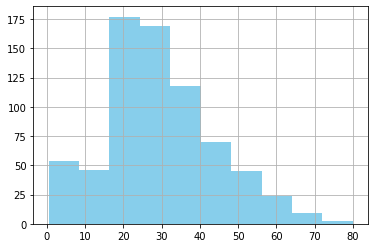

In [11]:
df["Age"].hist(color="skyblue")

- Según el conjunto de datos del Titanic, seleccione todas las filas para pasajeros masculinos y calcule la edad media de esos pasajeros. Haz lo mismo para las pasajeras.

In [12]:
#Cálcula la edad media de hombres
male=df[df["Sex"]=="male"]["Age"].mean()
print("Edad media hombres: ",male)
#Cálcula la edad media de mujeres
female=df[df["Sex"]=="female"]["Age"].mean()
print("Edad media mujeres: ",female)

Edad media hombres:  30.72664459161148
Edad media mujeres:  27.915708812260537


- Según el conjunto de datos del Titanic, ¿cuántos pasajeros mayores de 70 estaban en el Titanic?

In [13]:
#Cálcula la edad media de los pasajeros mayores de 70 años
setenteros=df[df["Age"]>70]["Age"].count()
print("Cantidad de pasajeros mayores de 70 años:",setenteros)

Cantidad de pasajeros mayores de 70 años: 5


- Calcula la edad promedio para cada sexo. Ahora utiliza el método `groupby`.

In [14]:
#Edad promedio por sexo
EdadSexo=df.groupby(by="Sex")["Age"].mean()
print(EdadSexo)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


- Calcule esta relación de supervivencia para todos los pasajeros menores de 25 años (recuerde: filtrado / indexación booleana).

In [15]:
supmenores=df[df["Age"]<25]["Survived"].sum()/df[df["Age"]<25]["Survived"].count()
print("Supervivencia pasajeros menores de 25 años: ",supmenores)

Supervivencia pasajeros menores de 25 años:  0.4244604316546763


- ¿Cuál es la diferencia en la proporción de supervivencia entre sexos?

In [16]:
ss=df.groupby(by="Sex")["Survived"].sum()/df.groupby(by="Sex")["Survived"].count()
print("Diferencia entre la supervivencia entre hombres y mujeres: ",ss[0]-ss[1])

Diferencia entre la supervivencia entre hombres y mujeres:  0.5531300709799203


- ¿O cómo difiere la proporción de sobrevivientes entre las diferentes clases de pasajeros? Haz una gráfica de barras visualizando la relación de supervivencia para las 3 clases.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


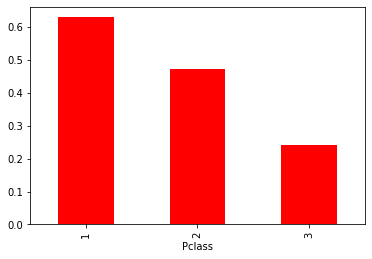

In [17]:
clase=df.groupby(by="Pclass")["Survived"].sum()/df.groupby(by="Pclass")["Survived"].count()
clase
clase.plot(kind="bar",color="red")
print(clase)

- Haga una gráfica de barras para visualizar la tarifa promedio pagada por los pasajeros de acuerdo a su edad. Para esto:
    - Primero, separamos a los pasajeros por rango, utilizando la función `pd.cut` y agregamos esta serie al DataFrame.
    - Debemos agrupar por esta columna y calcular el promedio de las tarifas.
    - Por último, agregamos `plot(kind='bar')` para obtener la gráfica de barras.

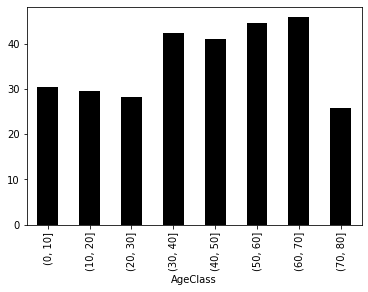

In [18]:
#Se genera el dataframe AgeClass
df['AgeClass']=pd.cut(df['Age'],bins=np.arange(0,90,10))
#Se agrupa por AgeClass y Fare para calcular la media
fareage=df.groupby(by="AgeClass")["Fare"].mean()
#Gráfica
fareage.plot(kind="bar",color="black")